**Lab Task 07**

Customer Segmentation using K-means Clustering

Objective: To segment customers into different groups

1. Load the customer segmentation dataset.
2. Clean the data by removing any duplicates, and missing values.
3. Preprocess the data by scaling the features to ensure they are on the same scale. You can use standardization or normalization techniques for this step.
4. Select the relevant features that are most important in determining customer behavior.
5. Apply K-means clustering to the preprocessed and selected features to identify
customer segments with similar behavior and demographics. Choose the optimal
number of clusters using techniques like the elbow method.
6. Visualize the resulting clusters using techniques like scatter plots.

Q1. When should we split the data into training and testing sets when using K-means clustering, and why?

Q2. Why do we need to scale the features before performing K-means clustering?

In [ ]:
#imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Cust_Segmentation.csv to Cust_Segmentation.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Cust_Segmentation.csv']))
# Dataset is now stored in a Pandas Dataframe
df.head(10)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
5,6,40,1,23,81,0.998,7.831,NaN,NBA016,10.9
6,7,38,2,4,56,0.442,0.454,0.0,NBA013,1.6
7,8,42,3,0,64,0.279,3.945,0.0,NBA009,6.6
8,9,26,1,5,18,0.575,2.215,NaN,NBA006,15.5
9,10,47,3,23,115,0.653,3.947,0.0,NBA011,4.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [ ]:
df.Defaulted.value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [ ]:
df.shape

(850, 10)

In [ ]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [ ]:
df.shape

(700, 10)

In [ ]:
df.head(10)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
6,7,38,2,4,56,0.442,0.454,0.0,NBA013,1.6
7,8,42,3,0,64,0.279,3.945,0.0,NBA009,6.6
9,10,47,3,23,115,0.653,3.947,0.0,NBA011,4.0
10,11,44,3,8,88,0.285,5.083,1.0,NBA010,6.1
12,13,24,1,7,18,0.526,0.643,0.0,NBA000,6.5


In [ ]:
df.nunique(axis=1)

In [ ]:
df.drop(['Address'], axis=1, inplace=True)

In [ ]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [ ]:
# Instantiate the scaler
scaler = MinMaxScaler()
columns = ['Income', 'Card Debt',	'Other Debt',	'DebtIncomeRatio']
# Scale the features
df[columns] = scaler.fit_transform(df[columns])

In [ ]:
# Step 4: Select relevant features
selected_features = ['Age', 'Years Employed', 'Income','Card Debt',	'Other Debt', 'DebtIncomeRatio']

df_selected = df[selected_features]


In [ ]:
df_selected.head()

,Age,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,41,6,0.011574,0.005450,0.038054,0.144254
1,47,26,0.199074,0.222395,0.302801,0.303178
2,33,10,0.099537,0.296803,0.213280,0.501222
3,29,4,0.011574,0.032556,0.017415,0.144254
4,47,31,0.553241,0.452382,0.328368,0.166259


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

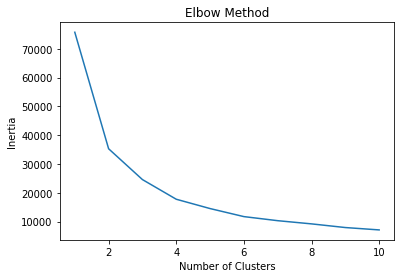

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [ ]:

# Use elbow method to find optimal number of clusters
SSE = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_selected)
    SSE.append(kmeans.inertia_)

plt.plot(range(1, 11), SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Based on elbow method, choose optimal number of clusters (e.g., 5)
kmeans = KMeans(num_clusters=5, random_state=42)
kmeans.fit(df_selected)


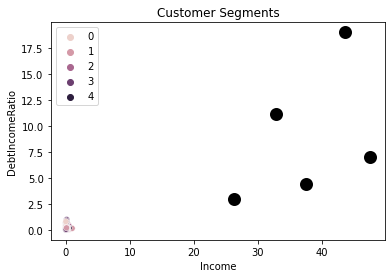

In [ ]:


# Assume kmeans is already fit and has transformed the data
sns.scatterplot(x='Income', y='DebtIncomeRatio', hue=kmeans.labels_, data=df_selected)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', s=100, linewidth=3, color='black')
plt.title('Customer Segments')
plt.xlabel('Income')
plt.ylabel('DebtIncomeRatio')
plt.show()


Q1. When should we split the data into training and testing sets when using K-means clustering, and why?

K-means clustering is an unsupervised learning approach, hence it is not essential to divide the data into training and testing sets. To assess the success of supervised learning algorithms, where we must predict a target variable, data is divided into training and testing sets. To compare how well the clustering method performs, we can still divide the data into training and testing groups.


Q2. Why do we need to scale the features before performing K-means clustering?

K-means clustering is a distance-based technique, which implies that in order to cluster data points, it determines the distance between them. If the features are on various scales, the distance calculations will favour the features with bigger scales, and the clusters will be skewed towards those features. The characteristics are scaled to make sure they are on the same scale and are given the same weight in the distance calculations.